In [1]:
!git clone https://github.com/henro25/teacher-and-student-models.git
!mv /content/teacher-and-student-models/* /content
!rm -r /content/teacher-and-student-models

Cloning into 'teacher-and-student-models'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 79 (delta 3), reused 15 (delta 2), pack-reused 62 (from 1)
Receiving objects: 100% (79/79), 254.03 MiB | 36.07 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Updating files: 100% (41/41), done.


Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training the Teacher Model:

Creating Big Class Map from Teacher:


<ipython-input-6-48feac825dc1>:483: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  teacher.load_state_dict(torch.load("teacher.pth", map_location=device))


Big Class Map: {0: 2, 1: 2, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 2}

Initializing Students:

Distilling Teacher Knowledge into the Router:


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10 - Router Distillation Loss: 7.8964
Epoch 2/10 - Router Distillation Loss: 7.7377
Epoch 3/10 - Router Distillation Loss: 7.6994
Epoch 4/10 - Router Distillation Loss: 7.6734
Epoch 5/10 - Router Distillation Loss: 7.6549
Epoch 6/10 - Router Distillation Loss: 7.6412
Epoch 7/10 - Router Distillation Loss: 7.6318
Epoch 8/10 - Router Distillation Loss: 7.6157
Epoch 9/10 - Router Distillation Loss: 7.6109
Epoch 10/10 - Router Distillation Loss: 7.5957

Visualizing Router Assignments:


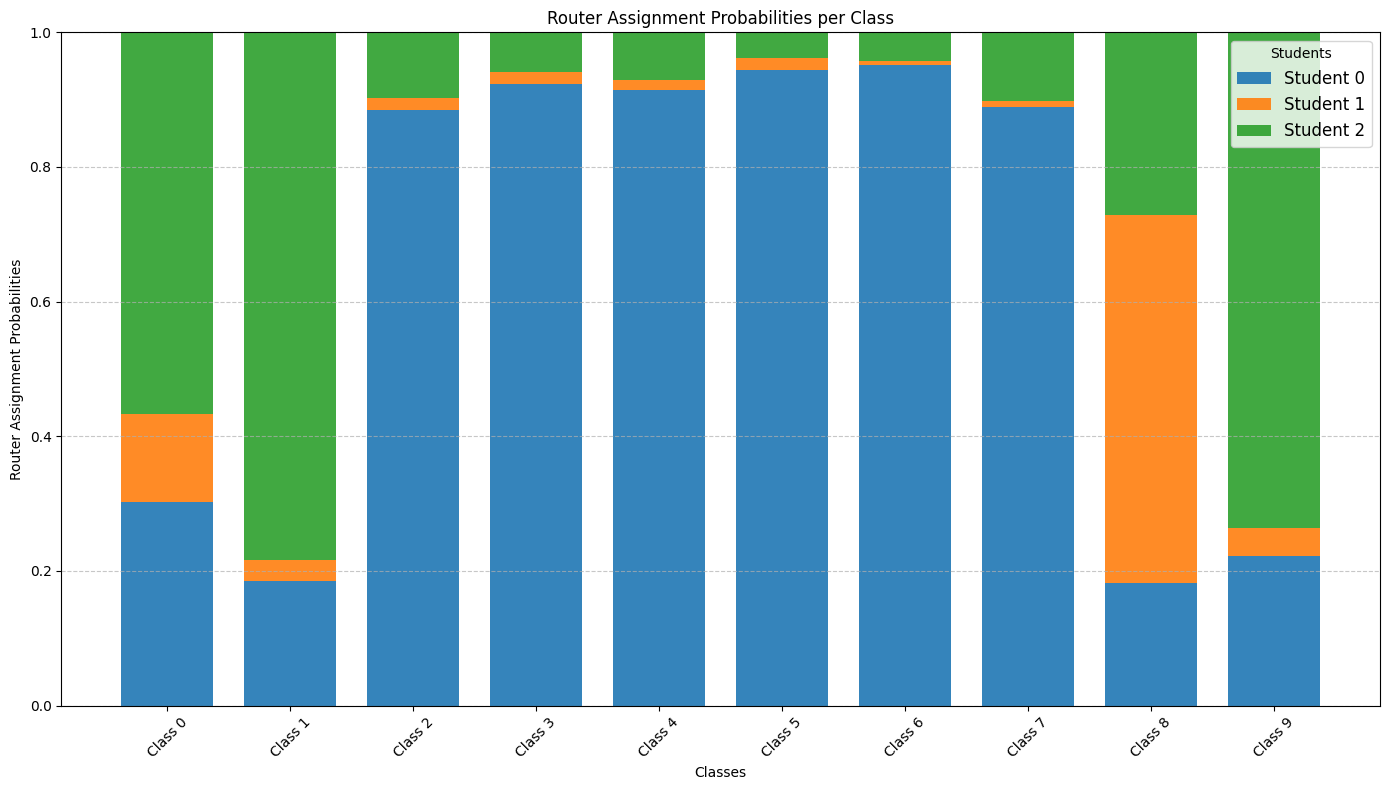


Distilling Teacher Knowledge into Students:
Distilled student models loaded successfully.

Joint Training of Mixture of Experts (MoE):


<ipython-input-6-48feac825dc1>:524: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  student.load_state_dict(torch.load(student_path, map_location=device))
/usr/local/lib/pytho

Epoch 1/20 - Loss: 0.1392, Accuracy: 0.9550
Epoch 2/20 - Loss: 0.0921, Accuracy: 0.9697
Epoch 3/20 - Loss: 0.0792, Accuracy: 0.9730
Epoch 4/20 - Loss: 0.0817, Accuracy: 0.9737
Epoch 5/20 - Loss: 0.0716, Accuracy: 0.9766
Epoch 6/20 - Loss: 0.0662, Accuracy: 0.9786
Epoch 7/20 - Loss: 0.0760, Accuracy: 0.9746
Epoch 8/20 - Loss: 0.0633, Accuracy: 0.9793
Epoch 9/20 - Loss: 0.0533, Accuracy: 0.9827
Epoch 10/20 - Loss: 0.0594, Accuracy: 0.9802
Epoch 11/20 - Loss: 0.0577, Accuracy: 0.9811
Epoch 12/20 - Loss: 0.0627, Accuracy: 0.9802
Epoch 13/20 - Loss: 0.0556, Accuracy: 0.9825
Epoch 14/20 - Loss: 0.0540, Accuracy: 0.9826


In [ ]:
!python create_student.py